<center>
    
# Statistics for Data Analysis: R Exercises 10

### 1. Birthweight data.


This is the full data set containing birthweight data for both boys and girls. You have analysed the girls data in the previous practical.

X,weight,week,sex
1,2968,40,M
2,2795,38,M
3,3163,40,M
4,2925,35,M
5,2625,36,M
6,2847,37,M
7,3292,41,M
8,3473,40,M
9,2628,37,M
10,3176,38,M


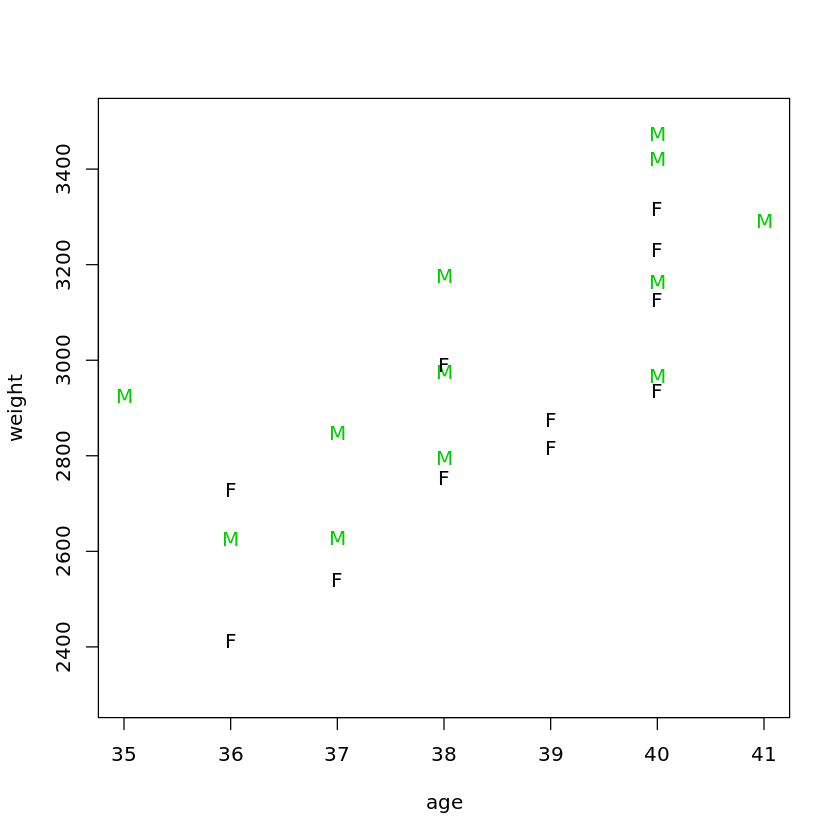

In [4]:
birth <- read.csv("data/birthweight.csv",header=TRUE)
birth 
age <- birth$week
weight <- birth$weight
sex <-birth$sex 

# plot 
plot(age[sex=="M"],weight[sex=="M"],xlab="age",ylab="weight", 
     pch="M",col=3,ylim=c(2300,3500))
points(age[sex=="F"],weight[sex=="F"],pch="F",col=1)

We have a factor sex in addition to the regression variable age that we had for the girls data. 

* We can ﬁt the model we have seen in the lecture with the command.

In [5]:
birth1.lm <- lm(weight~age+sex)

##### Find the estimates of the parameters. How can you interpret them? 

We may want to allow also a diﬀerent rate of increase (slope) between boys and girls. This can be done by including an additional predictor (called interaction) whih is given by the product between the age and the indicator variable:

In [6]:
birth2.lm <- lm(weight~age*sex) 
# or, equivalently
birth2.lm <- lm(weight~age+sex+age:sex)

In [20]:
summary(birth2.lm)


Call:
lm(formula = weight ~ age + sex + age:sex)

Residuals:
    Min      1Q  Median      3Q     Max 
-246.69 -138.11  -39.13  176.57  274.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2141.67    1163.60  -1.841 0.080574 .  
age           130.40      30.00   4.347 0.000313 ***
sexM          872.99    1611.33   0.542 0.593952    
age:sexM      -18.42      41.76  -0.441 0.663893    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.6 on 20 degrees of freedom
Multiple R-squared:  0.6435,	Adjusted R-squared:   0.59 
F-statistic: 12.03 on 3 and 20 DF,  p-value: 0.000101


##### Does this suggest that the boys’ and girls’ rate of increase of weight with age are the same? What do you conclude? Check the assumption of the model with the appropriate diagnostic plots.

## 2. Savings data 

We consider now an economic dataset including 50 diﬀerent countries. This dataset is available as example within R.


,sr,pop15,pop75,dpi,ddpi
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56
Canada,8.79,31.72,2.85,2982.88,2.43


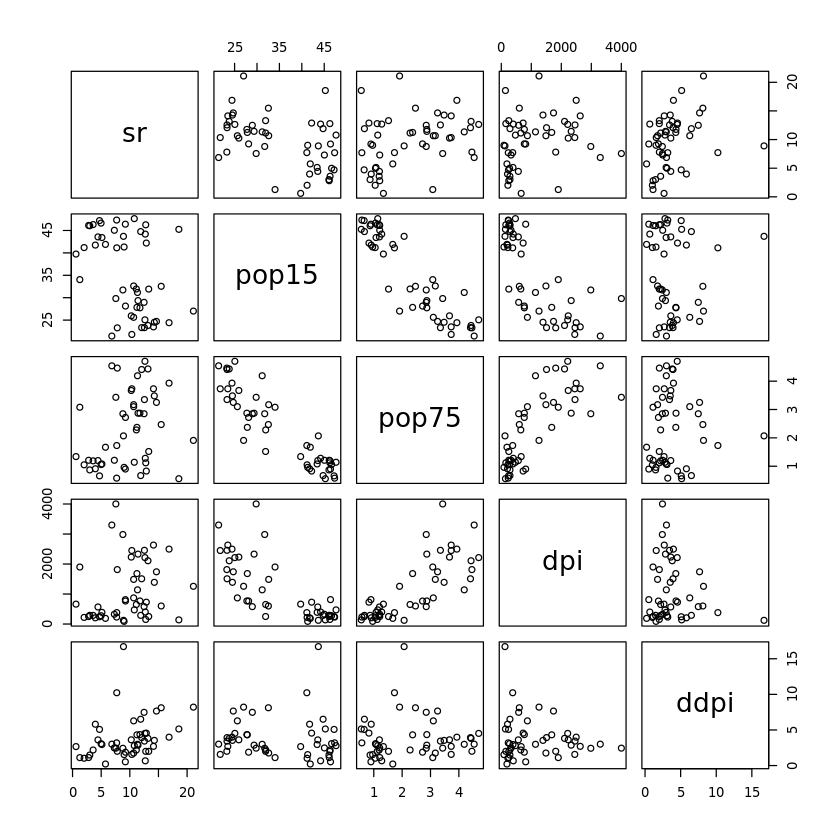

In [7]:
data("LifeCycleSavings")
head(LifeCycleSavings)
plot(LifeCycleSavings)

The data are averages between 1960 and 1970 of three economic indices: dpi is the per capita disposable income in US dollars, ddpi is the percentage rate of change in the percapita disposable income and sr is the aggregate personal saving divided by disposable income. The data include also the proportions of the population under 15 and over 75, pop15 and pop75 respectively. We want to investigate the relationship between savings and the other variables in the dataset. The description of this dataset that you can ﬁnd in the help states that

    ”Under the life-cycle savings hypothesis as developed by Franco Modigliani, the savings ratio (aggregate personal saving divided by disposable income) is explained by per-capita disposable income, the percentage rate of change in per-capita disposable income, and two demographic variables: the percentage of population less than 15 years old and the percentage of the population over 75 years old. The data are averaged over the decade 1960–1970 to remove the business cycle or other short-term ﬂuctuations.”

We want to ﬁt a model to see if this dataset supports this theory.


Call:
lm(formula = sr ~ pop15 + pop75 + ddpi + dpi)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2422 -2.6857 -0.2488  2.4280  9.7509 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.5660865  7.3545161   3.884 0.000334 ***
pop15       -0.4611931  0.1446422  -3.189 0.002603 ** 
pop75       -1.6914977  1.0835989  -1.561 0.125530    
ddpi         0.4096949  0.1961971   2.088 0.042471 *  
dpi         -0.0003369  0.0009311  -0.362 0.719173    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.803 on 45 degrees of freedom
Multiple R-squared:  0.3385,	Adjusted R-squared:  0.2797 
F-statistic: 5.756 on 4 and 45 DF,  p-value: 0.0007904


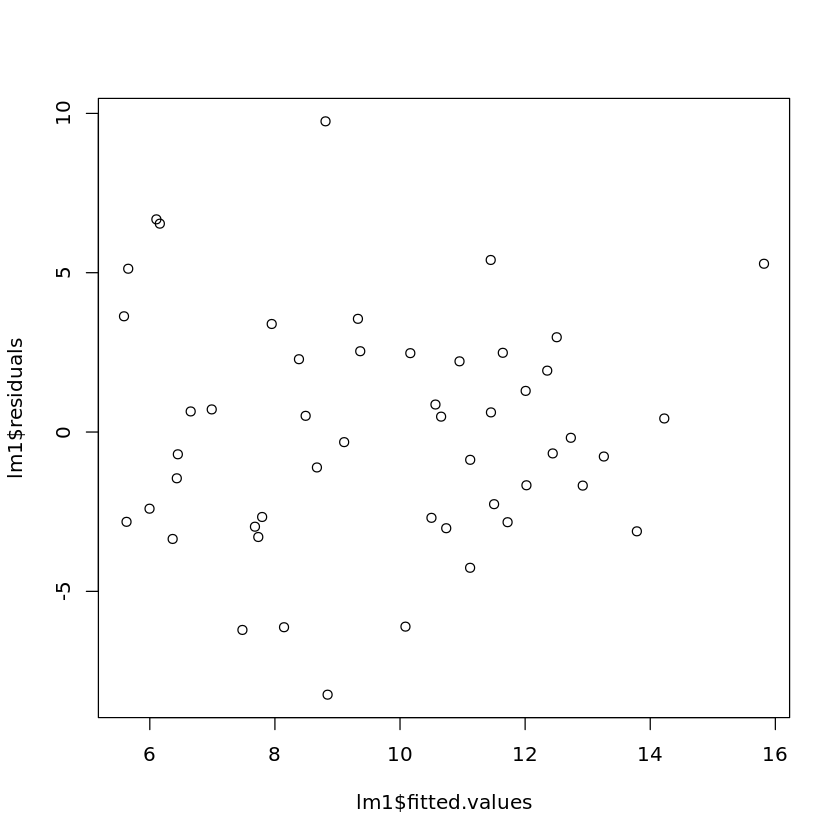

In [8]:
attach(LifeCycleSavings)
lm1<-lm(sr~pop15+pop75+ddpi+dpi)
summary(lm1)
plot(lm1$fitted.values,lm1$residuals)

### (a) Write down the mathematical expression of the model. Based on the output of the summary command and on the residuals plot, is the model a good ﬁt for the data?


### (b) The following instruction carry out the F-test for the sequence of nested models (including one predictor at the time):

In [9]:
anova(lm1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
pop15,1,204.117565,204.117565,14.1157322,0.0004921955
pop75,1,53.342710,53.342710,3.6889104,0.0611254598
ddpi,1,73.561829,73.561829,5.0871618,0.0290132352
dpi,1,1.893148,1.893148,0.1309204,0.7191731554
Residuals,45,650.712998,14.460289,NA,NA


Which model should be preferred? Note that the answer depends on the order in which the predictors are added into the model. Fit the chosen model and write down the estimates for the parameters.

In [11]:
lm_R <- lm(sr~pop15+pop75+ddpi)
summary(lm_R)


Call:
lm(formula = sr ~ pop15 + pop75 + ddpi)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2539 -2.6159 -0.3913  2.3344  9.7070 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.1247     7.1838   3.915 0.000297 ***
pop15        -0.4518     0.1409  -3.206 0.002452 ** 
pop75        -1.8354     0.9984  -1.838 0.072473 .  
ddpi          0.4278     0.1879   2.277 0.027478 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.767 on 46 degrees of freedom
Multiple R-squared:  0.3365,	Adjusted R-squared:  0.2933 
F-statistic: 7.778 on 3 and 46 DF,  p-value: 0.0002646


#### (c) We can also test if two (or more) variables can be excluded together from the model, using the F-test of their residual sums of squares. To implement this in R, we need ﬁrst to ﬁt the two models (with and without the variables in question) and then use the anova command. For example:


In [12]:
lm2<-lm(sr~pop15+ddpi)
anova(lm2,lm1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
47,700.5519,NA,NA,NA,NA
45,650.7130,2,49.83887,1.723301,0.1900451


Is the addition of the percentage of population over 75 and of the growth in the income needed in the model?

#### (d) What can we conclude about the economic theory?

## 3. A two-way ANOVA example

In this exercise we consider the so-called two-way ANOVA, i.e. the comparison between the mean of diﬀerent groups when the groups are identiﬁed by the combination of two factors. We analyse the same dataset used for one of the question of the tutorial, where three treatments (control, A and B) are applied to the plants in two diﬀerent ﬁelds 1 and 2. The ﬁle "plants.csv" contains the mass of each plant (mass), the treatment (treatment) and the ﬁeld where the plant grew up (field).


X,mass,treatment,field
1,1.1097910,control,1
2,1.1525865,control,1
3,0.9056535,control,1
4,1.0048710,control,1
5,0.5887068,control,1
6,1.2750039,control,2


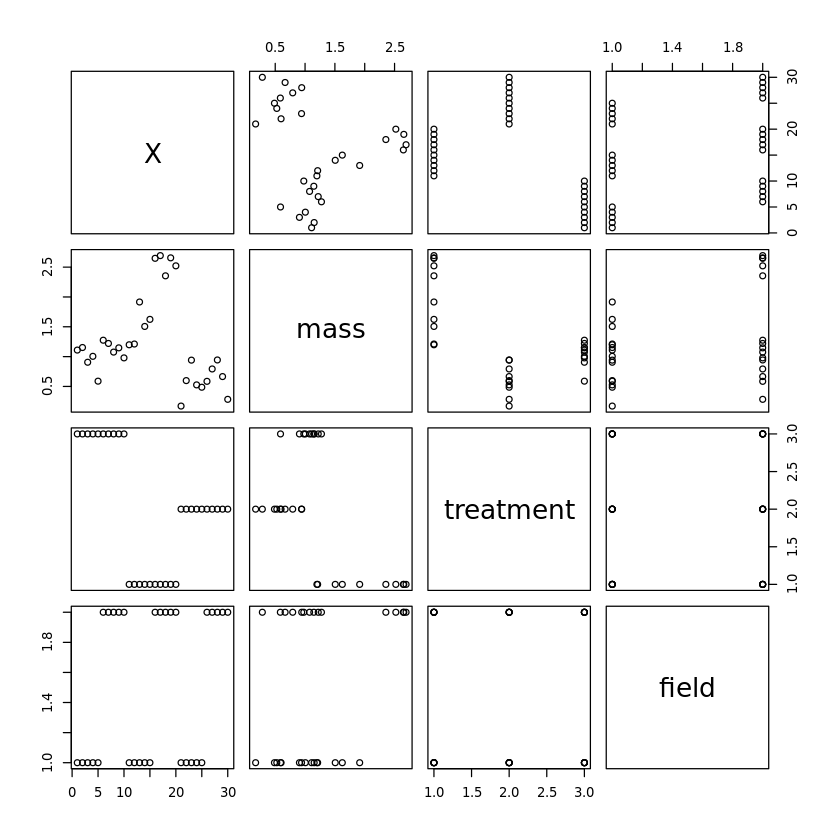

In [14]:
data<-read.csv("data/plants.csv",header=TRUE)
head(data)
plot(data)
attach(data)

We can ﬁt the model easily by specifying to R to treat the factors as such:


In [15]:
treatment<-as.factor(treatment)
field<-as.factor(field)

The linear model can now be ﬁtted with the same command we used for quantitative variables:


Call:
lm(formula = mass ~ treatment * field)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37333 -0.06741  0.01292  0.12958  0.42443 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.4910     0.1018  14.643 1.83e-13 ***
treatmentB               -0.9463     0.1440  -6.571 8.51e-07 ***
treatmentcontrol         -0.5387     0.1440  -3.741 0.001012 ** 
field2                    1.0832     0.1440   7.522 9.22e-08 ***
treatmentB:field2        -0.9735     0.2037  -4.780 7.27e-05 ***
treatmentcontrol:field2  -0.8961     0.2037  -4.400 0.000191 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2277 on 24 degrees of freedom
Multiple R-squared:  0.9173,	Adjusted R-squared:  0.9001 
F-statistic: 53.26 on 5 and 24 DF,  p-value: 3.284e-12


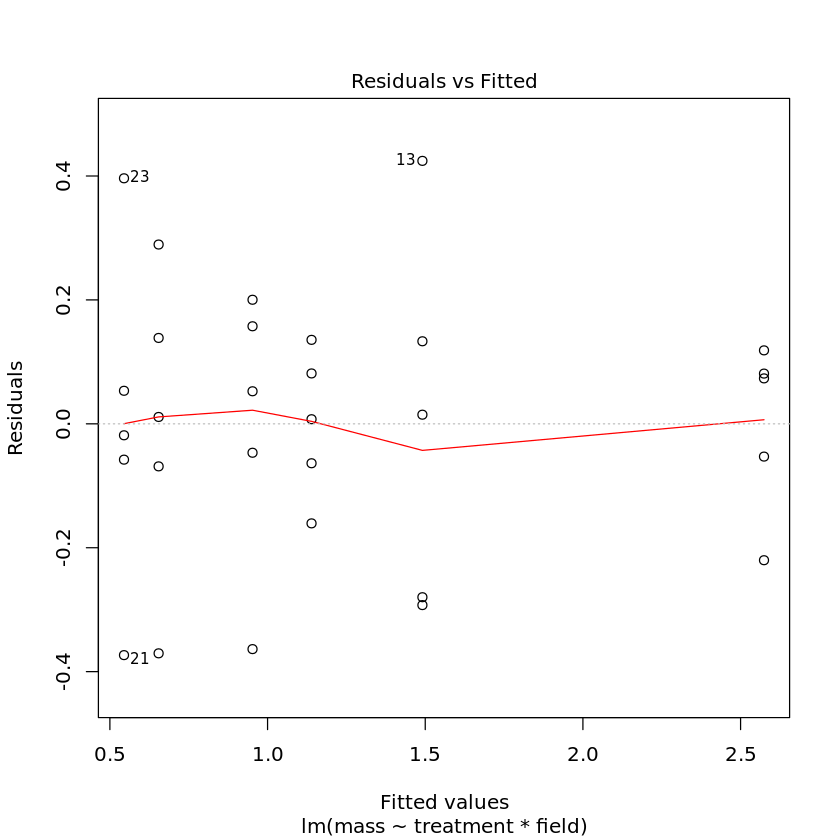

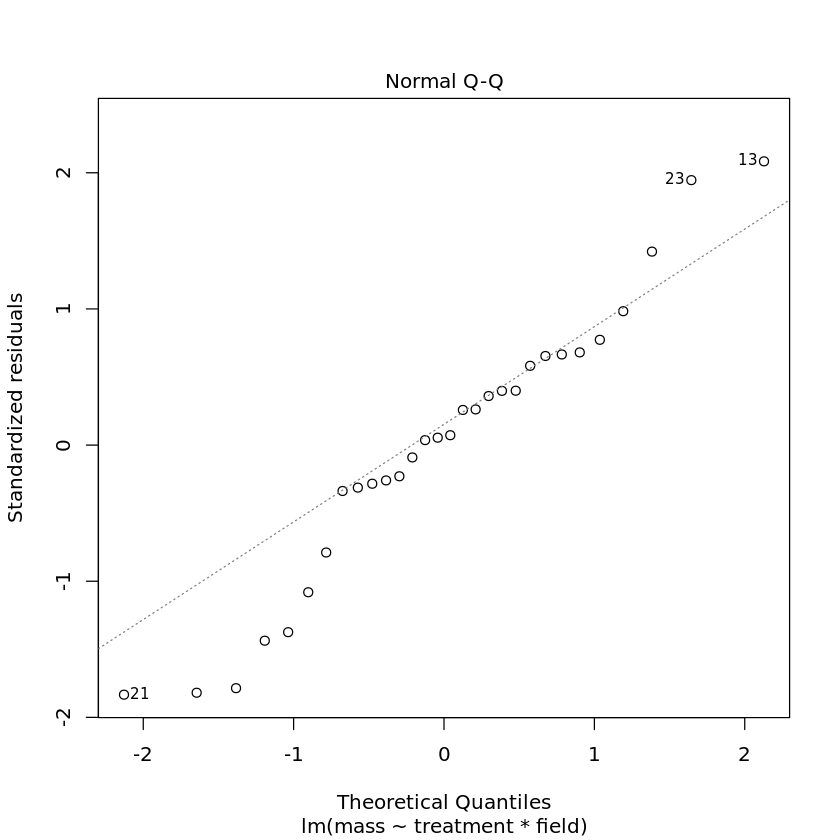

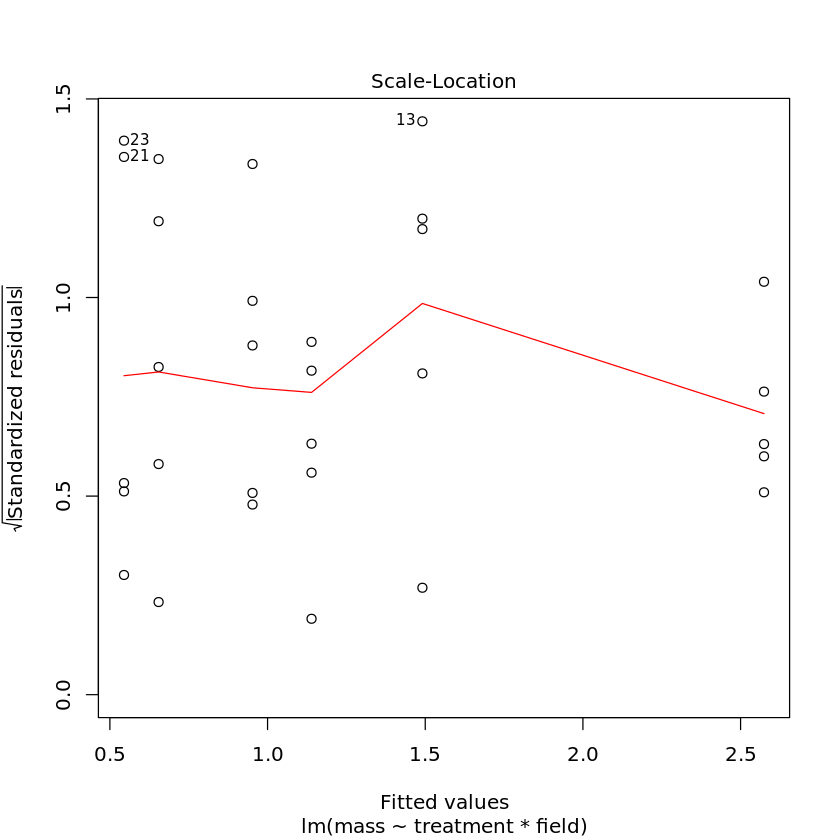

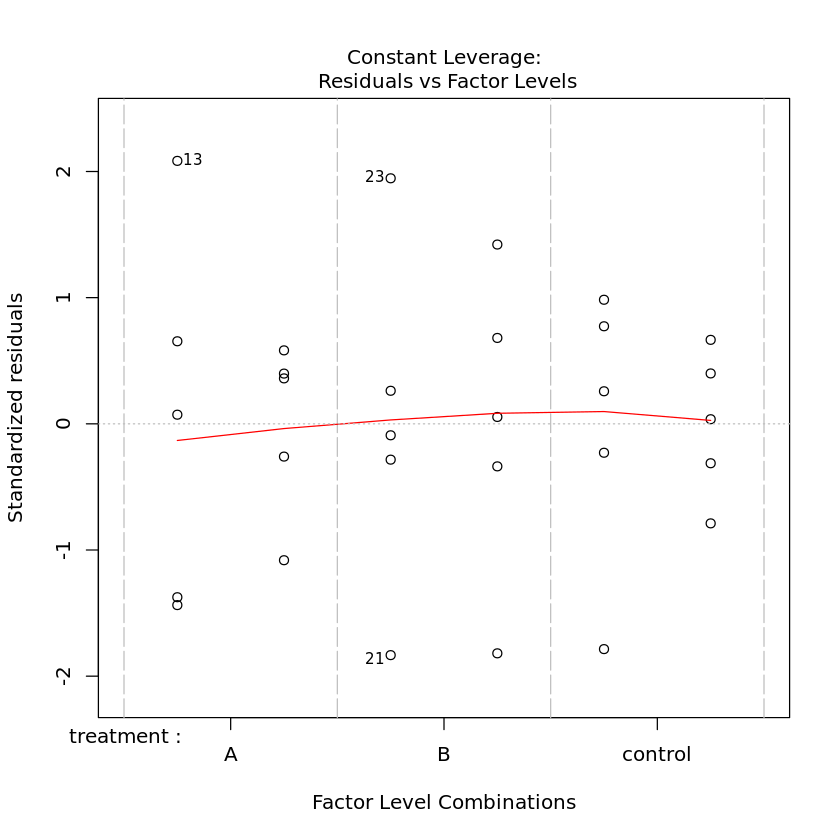

In [16]:
ANOVA_TWO_WAY<-lm(mass~treatment*field)
summary(ANOVA_TWO_WAY)
plot(ANOVA_TWO_WAY)

alternatively, we can deﬁne a model through indicator variables:

In [17]:
x1<-as.double(treatment=="A")
x2<-as.double(treatment=="B")
x3<-as.double(field==2) 
# model 
model_dummy<-lm(mass~x1*x3+x2*x3)
summary(model_dummy)


Call:
lm(formula = mass ~ x1 * x3 + x2 * x3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37333 -0.06741  0.01292  0.12958  0.42443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.95232    0.10183   9.352 1.79e-09 ***
x1           0.53870    0.14401   3.741 0.001012 ** 
x3           0.18714    0.14401   1.300 0.206101    
x2          -0.40758    0.14401  -2.830 0.009254 ** 
x1:x3        0.89609    0.20366   4.400 0.000191 ***
x3:x2       -0.07737    0.20366  -0.380 0.707356    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2277 on 24 degrees of freedom
Multiple R-squared:  0.9173,	Adjusted R-squared:  0.9001 
F-statistic: 53.26 on 5 and 24 DF,  p-value: 3.284e-12


* Even though the two models are equivalent, you should obtain diﬀerent numerical values with respect to the ANOVA_TWO_WAY model, can you explain why?
* Deﬁne a new set of indicator variables that allows to ﬁt exactly the same model as in ANOVA_TWO_WAY.
